In [ ]:
'''Chatgpt Link:https://chatgpt.com/share/67a725fb-affc-8003-add9-457cbe97881b'''

In [ ]:
'''1. Investigate how edge detection performance is affected by varying illumination conditions (low vs. high light levels) in both synthetic and natural images. Using edge metrics compare them.
Edge Metrics
        a. Edge Strength (Gradient Magnitude)
        b. Edge Sharpness (Variance of Laplacian)
        c. Edge Density
        d. Edge Contrast(Michelson Contrast)
'''

/home/student/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/student/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


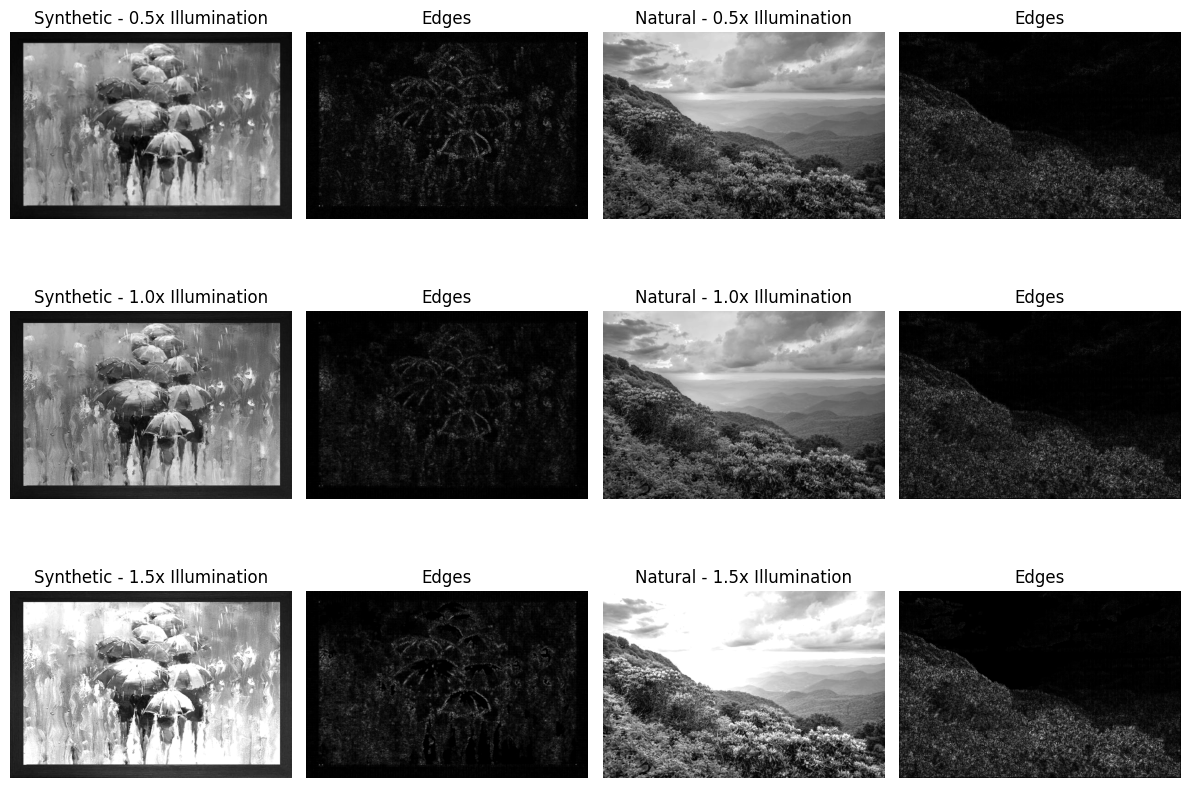

  Image Type  Illumination Factor  Edge Strength  Edge Sharpness  \
0  Synthetic                  0.5      19.840342       12.247804   
1    Natural                  0.5      35.483135      363.617266   
2  Synthetic                  1.0      59.345155      428.388271   
3    Natural                  1.0      70.872104     1444.613048   
4  Synthetic                  1.5      73.995995      833.689466   
5    Natural                  1.5      97.144085     3194.697554   

   Edge Density  Edge Contrast  
0      0.707637       0.937984  
1      0.799028       1.000000  
2      0.855975       1.000000  
3      0.848127       1.000000  
4      0.788868       1.000000  
5      0.733860       1.000000  


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def adjust_illumination(image, factor):
    """Adjust illumination by multiplying pixel values by a factor."""
    image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return image

def apply_edge_detection(image, method='sobel'):
    """Apply edge detection using Sobel, Prewitt, or Roberts."""
    if method == 'sobel':
        edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    elif method == 'prewitt':
        kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
        kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        edges_x = cv2.filter2D(image, -1, kernelx)
        edges_y = cv2.filter2D(image, -1, kernely)
        edges = edges_x + edges_y
    elif method == 'roberts':
        kernelx = np.array([[1, 0], [0, -1]])
        kernely = np.array([[0, 1], [-1, 0]])
        edges_x = cv2.filter2D(image, -1, kernelx)
        edges_y = cv2.filter2D(image, -1, kernely)
        edges = edges_x + edges_y
    else:
        raise ValueError("Invalid edge detection method")
    
    return cv2.convertScaleAbs(edges)

def compute_edge_metrics(image, edges):
    """Compute edge metrics."""
    # Edge Strength (Gradient Magnitude using Sobel filter)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    edge_strength = np.mean(gradient_magnitude)
    
    # Edge Sharpness (Variance of Laplacian)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    edge_sharpness = np.var(laplacian)
    
    # Edge Density (Ratio of edge pixels to total pixels)
    edge_density = np.sum(edges > 0) / (image.shape[0] * image.shape[1])
    
    # Edge Contrast (Michelson Contrast)
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    edge_contrast = (max_intensity - min_intensity) / (max_intensity + min_intensity + 1e-6)
    
    return edge_strength, edge_sharpness, edge_density, edge_contrast

# Load synthetic (painting-like) and natural images
synthetic_img = cv2.imread(r'/home/student/Downloads/synthetic.jpg', cv2.IMREAD_GRAYSCALE)
natural_img = cv2.imread(r'/home/student/Downloads/natural.jpg', cv2.IMREAD_GRAYSCALE)

# Illumination levels
illumination_factors = [0.5, 1.0, 1.5]  # Low, Medium, High
edge_method = 'sobel'  # Using only one edge detection method

# Store results
results = []
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for i, factor in enumerate(illumination_factors):
    for j, (img, img_type) in enumerate([(synthetic_img, 'Synthetic'), (natural_img, 'Natural')]):
        modified_img = adjust_illumination(img, factor)
        
        if img_type == 'Synthetic' and i == 0:
            modified_img = cv2.GaussianBlur(modified_img, (5, 5), 0)
        
        edges = apply_edge_detection(modified_img, method=edge_method)
        
        # Compute metrics
        edge_strength, edge_sharpness, edge_density, edge_contrast = compute_edge_metrics(modified_img, edges)
        results.append([img_type, factor, edge_strength, edge_sharpness, edge_density, edge_contrast])
        
        # Display images
        axes[i, j * 2].imshow(modified_img, cmap='gray')
        axes[i, j * 2].set_title(f'{img_type} - {factor}x Illumination')
        axes[i, j * 2].axis('off')
        
        axes[i, j * 2 + 1].imshow(edges, cmap='gray')
        axes[i, j * 2 + 1].set_title('Edges')
        axes[i, j * 2 + 1].axis('off')

plt.tight_layout()
plt.show()

# Convert results to DataFrame and print
columns = ['Image Type', 'Illumination Factor', 'Edge Strength', 'Edge Sharpness', 'Edge Density', 'Edge Contrast']
df_results = pd.DataFrame(results, columns=columns)
print(df_results)


In [ ]:
'''Explore the fusion(Weighted average Fusion, Max/Min Fusion, Logical Operations (Binary Fusion)- OR , AND)  of edge maps from different edge detection algorithms( sobel, prewit, Robert) to improve performance under varying illumination conditions. '''

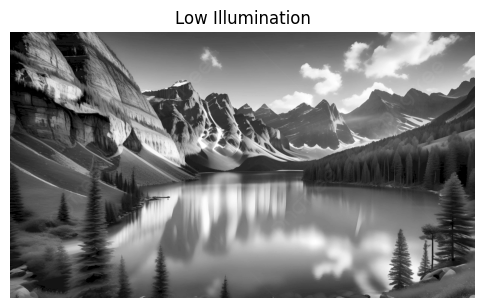

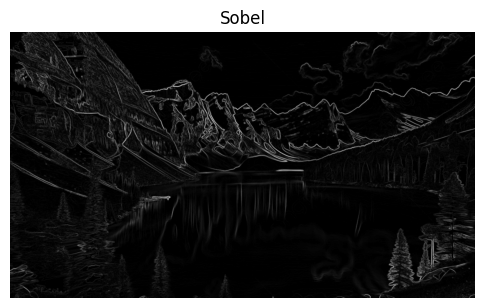

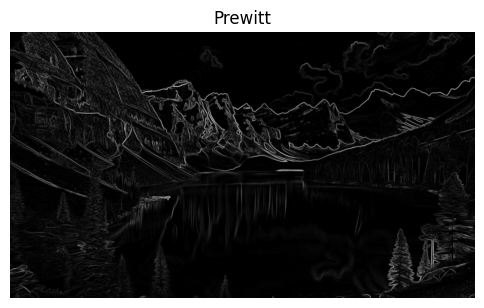

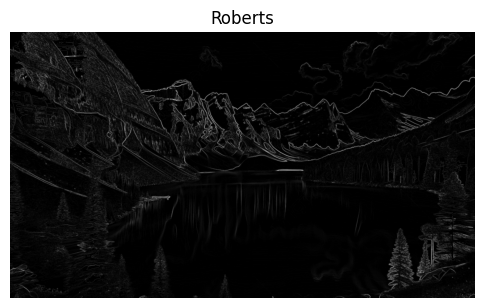

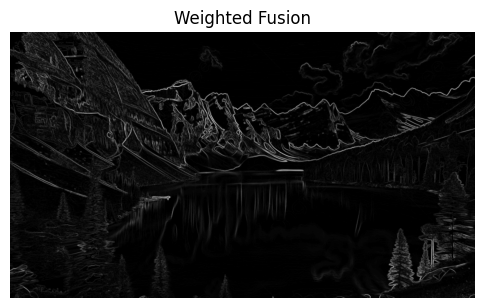

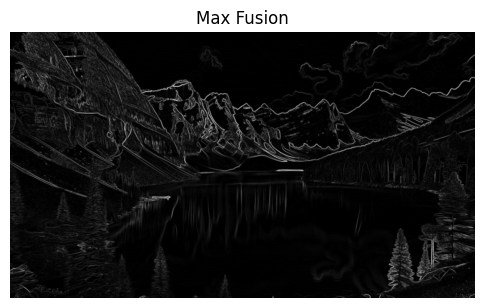

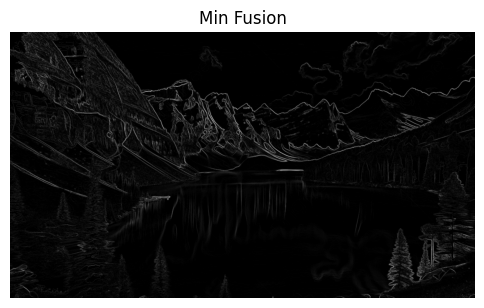

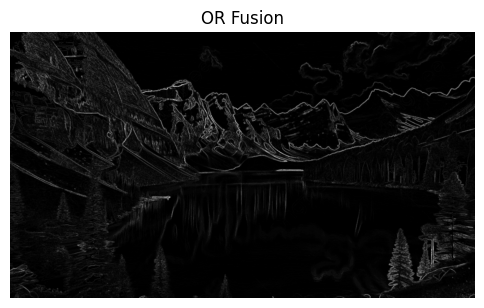

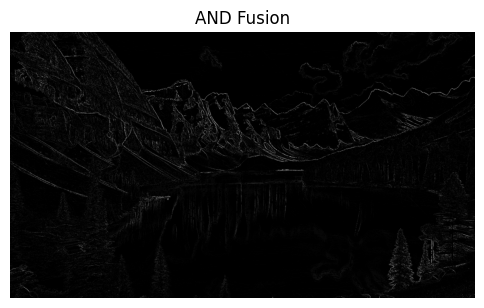

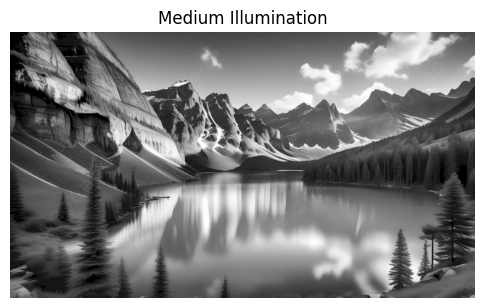

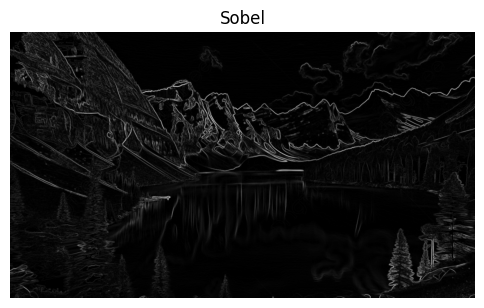

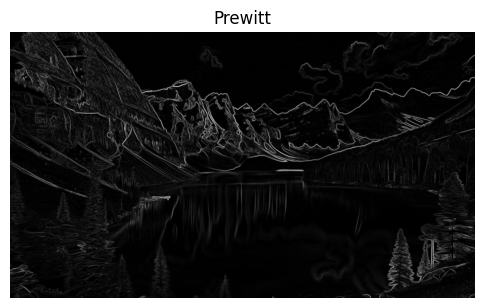

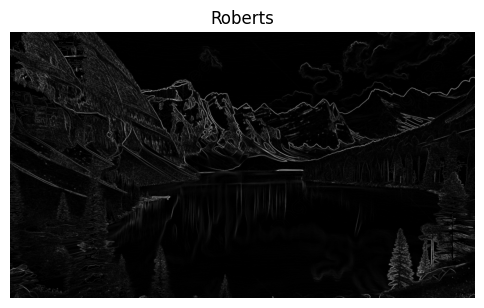

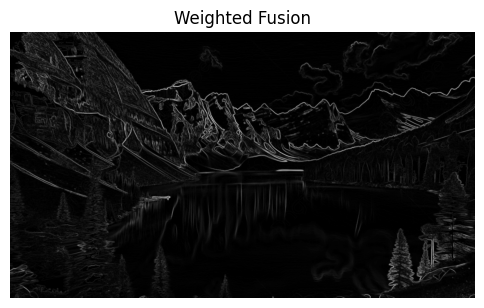

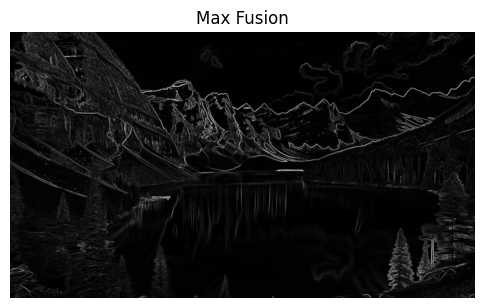

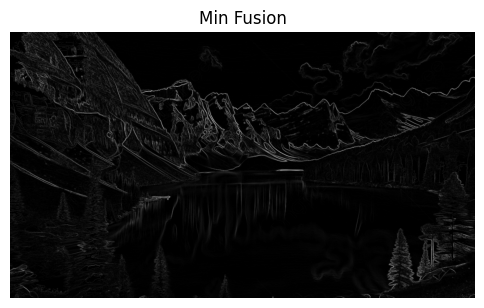

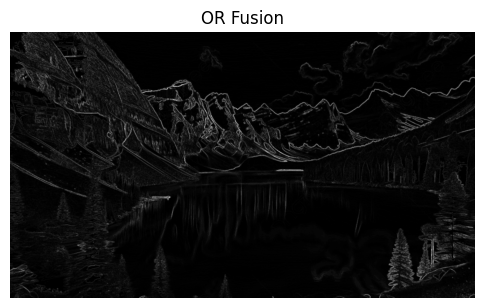

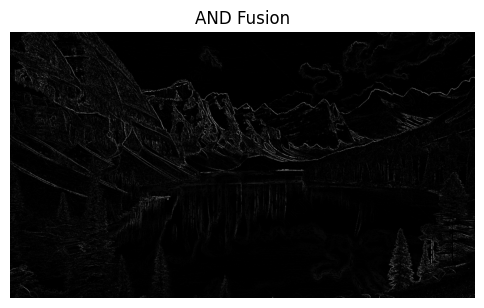

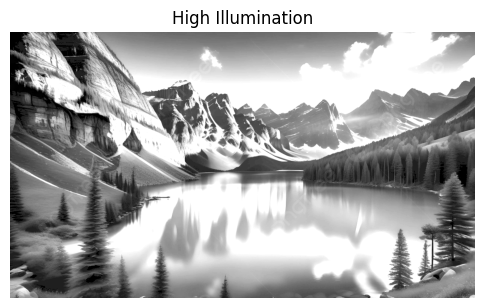

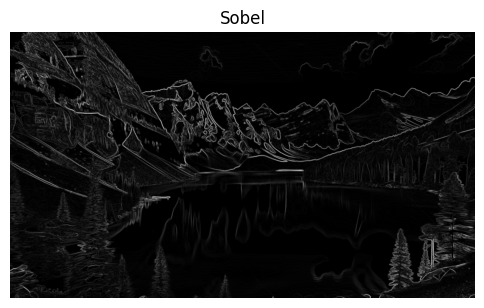

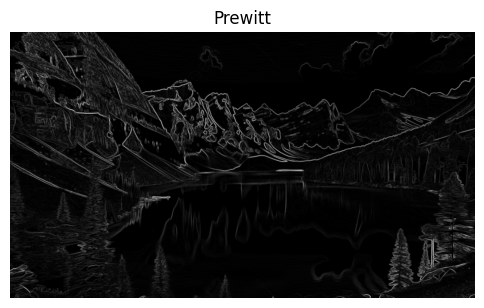

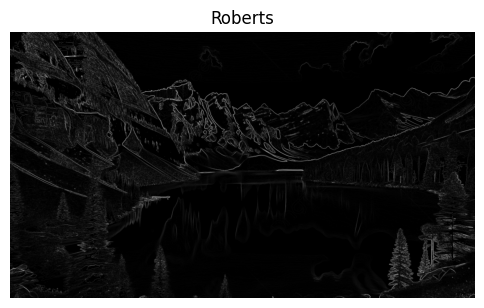

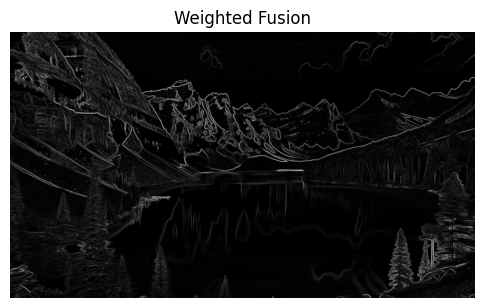

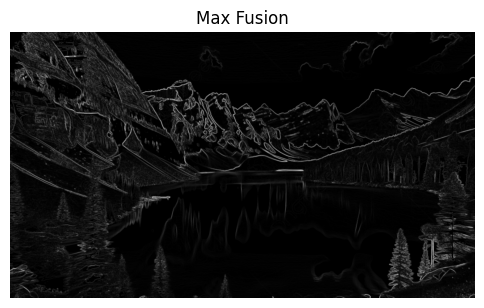

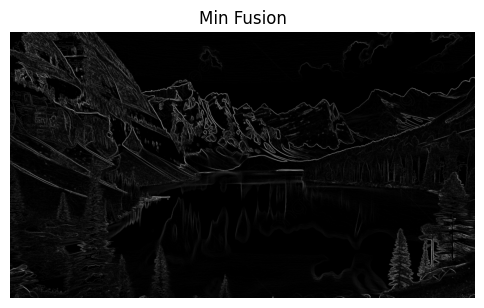

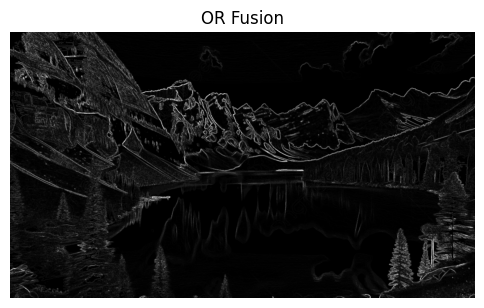

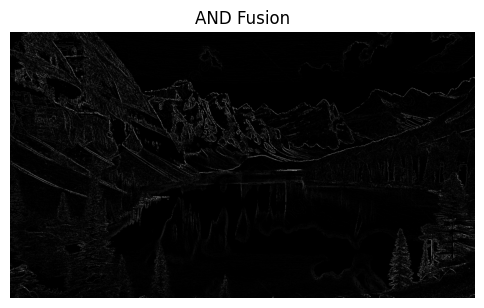

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, prewitt, sobel

# Load the image in grayscale
image = cv2.imread(r'/home/student/Downloads/mountain.jpg', cv2.IMREAD_GRAYSCALE)

# Simulate low, medium, and high illumination by adjusting brightness
def adjust_brightness(image, factor):
    """Adjust brightness of the image by a factor."""
    image = np.clip(image * factor, 0, 255).astype(np.uint8)
    return image

# Create images with varying illumination
image_low = adjust_brightness(image, 0.5)  # Low illumination
image_medium = image  # Medium illumination (original image)
image_high = adjust_brightness(image, 1.5)  # High illumination

# Function to apply edge detection filters
def apply_edge_detection(image):
    edges_sobel = sobel(image)
    edges_prewitt = prewitt(image)
    edges_roberts = roberts(image)
    
    # Normalize edges to 0-255
    edges_sobel = (edges_sobel * 255).astype(np.uint8)
    edges_prewitt = (edges_prewitt * 255).astype(np.uint8)
    edges_roberts = (edges_roberts * 255).astype(np.uint8)

    return edges_sobel, edges_prewitt, edges_roberts

# Function to apply fusion techniques
def apply_fusion(edges_sobel, edges_prewitt, edges_roberts):
    # Weighted Average Fusion
    fused_weighted = cv2.addWeighted(edges_sobel, 0.5, edges_prewitt, 0.3, 0)
    fused_weighted = cv2.addWeighted(fused_weighted, 1.0, edges_roberts, 0.2, 0)

    # Max Fusion
    fused_max = np.maximum(np.maximum(edges_sobel, edges_prewitt), edges_roberts)

    # Min Fusion
    fused_min = np.minimum(np.minimum(edges_sobel, edges_prewitt), edges_roberts)

    # Logical OR Fusion
    fused_or = cv2.bitwise_or(cv2.bitwise_or(edges_sobel, edges_prewitt), edges_roberts)

    # Logical AND Fusion
    fused_and = cv2.bitwise_and(cv2.bitwise_and(edges_sobel, edges_prewitt), edges_roberts)

    return fused_weighted, fused_max, fused_min, fused_or, fused_and

# Prepare the titles for each illumination level and fusion technique
titles_low = ["Low Illumination", "Sobel", "Prewitt", "Roberts", 
              "Weighted Fusion", "Max Fusion", "Min Fusion", "OR Fusion", "AND Fusion"]
titles_medium = ["Medium Illumination", "Sobel", "Prewitt", "Roberts", 
                 "Weighted Fusion", "Max Fusion", "Min Fusion", "OR Fusion", "AND Fusion"]
titles_high = ["High Illumination", "Sobel", "Prewitt", "Roberts", 
               "Weighted Fusion", "Max Fusion", "Min Fusion", "OR Fusion", "AND Fusion"]

# Prepare a list to store images for plotting
images = []
illumination_conditions = [image_low, image_medium, image_high]

# Loop through each illumination condition
for img in illumination_conditions:
    edges_sobel, edges_prewitt, edges_roberts = apply_edge_detection(img)
    fused_weighted, fused_max, fused_min, fused_or, fused_and = apply_fusion(edges_sobel, edges_prewitt, edges_roberts)
    
    # Add the images for each illumination condition and fusion technique
    images.append(img)  # Original image (Low, Medium, High Illumination)
    images.extend([edges_sobel, edges_prewitt, edges_roberts, 
                  fused_weighted, fused_max, fused_min, fused_or, fused_and])

# Display the images one by one with titles
for i, image in enumerate(images):
    plt.figure(figsize=(6, 6))  # Increase figure size for each image
    plt.imshow(image, cmap="gray")
    
    # Print the appropriate title
    if i < 9:
        title = titles_low[i]
    elif i < 18:
        title = titles_medium[i - 9]
    else:
        title = titles_high[i - 18]
    
    plt.title(title)
    plt.axis("off")  # Remove axes for a clean display
    plt.show()
